In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd # 분석용 파이썬 라이브러리 패키지
import numpy as np # 계산용 파이썬 라이브러리 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화 파이썬 라이브러리 패키지
import seaborn as sns # 시각화 파이썬 라이브러리 패키지 as는 seaborn을 sns로 쓰겠다는 말

data = pd.read_csv("/content/drive/MyDrive/stand_0908_kmeans(k5).csv", encoding="euc-kr")
data

,Neck,Hip,cluster,FILE_Name,OuPut
0,0.686941,-0.474391,3,20220819_153418_025_saved.jpg,GOOD
1,0.736076,3.163167,2,20220819_153418_023_saved.jpg,GOOD
2,0.736076,3.531086,2,20220819_153418_024_saved.jpg,GOOD
3,0.690709,-0.390089,3,20220819_153418_027_saved.jpg,GOOD
4,0.733231,3.513370,2,20220819_153418_026_saved.jpg,GOOD
...,...,...,...,...,...
2346,0.455804,-2.850955,4,IMG_9996.jpg,BAD4
2347,0.459648,-2.668472,4,IMG_9995.jpg,BAD4
2348,0.471913,-2.793670,4,IMG_9998.jpg,BAD4
2349,0.475680,-2.804596,4,IMG_9997.jpg,BAD4


In [39]:
# 잘못나눠진 2, 4 그룹 제거

drop = data[(data['cluster'] == 2) | (data['cluster'] == 4)].index

data = data.drop(drop)

data.isnull().sum()

Neck         0
Hip          0
cluster      0
FILE_Name    0
OuPut        0
dtype: int64

In [40]:
data = data.reset_index()
data.drop(columns=["index"],inplace=True)
data

,Neck,Hip,cluster,FILE_Name,OuPut
0,0.686941,-0.474391,3,20220819_153418_025_saved.jpg,GOOD
1,0.690709,-0.390089,3,20220819_153418_027_saved.jpg,GOOD
2,0.756990,-0.261937,3,20220819_153424_002_saved.jpg,GOOD
3,0.715199,-0.388760,3,20220819_153418_029_saved.jpg,GOOD
4,0.686941,-0.348749,3,20220819_153424_001_saved.jpg,GOOD
...,...,...,...,...,...
2162,-1.390030,-1.733023,0,IMG_9974.jpg,BAD4
2163,-1.390030,-1.749559,0,IMG_9976.jpg,BAD4
2164,-1.414213,-1.723279,0,IMG_9973.jpg,BAD4
2165,-1.405255,-1.705267,0,IMG_9975.jpg,BAD4


In [41]:
kmeans_data = data[["Neck", "Hip"]] # 필요한 행만 가져옴
# kmeans_data = data[["Neck", "Knee"]] # 필요한 행만 가져옴

In [42]:
# 데이터 표준화 # 군집화 하려면 필수

from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1

scaler = StandardScaler()   
scaler = scaler.fit_transform(kmeans_data)

scaler = pd.DataFrame(scaler)
scaler = scaler.rename(columns = {0:'Neck', 1:'Hip'}) 
# scaler = scaler.rename(columns = {0:'Neck', 1:'Knee'}) 
scaler

,Neck,Hip
0,0.707172,-0.626555
1,0.710871,-0.480589
2,0.775942,-0.258700
3,0.734914,-0.478289
4,0.707172,-0.409012
...,...,...
2162,-1.331897,-2.805821
2163,-1.331897,-2.834452
2164,-1.355638,-2.788949
2165,-1.346844,-2.757762


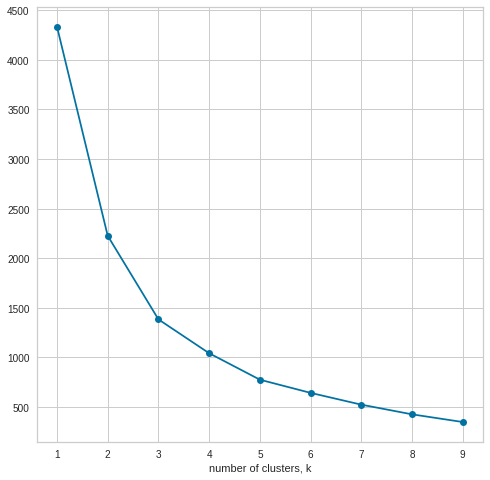

In [43]:
# Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데
# 이 지점의 K 값을 군집의 개수로 사용

from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaler)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(8, 8))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('')
plt.xticks(ks)
plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b32003210>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

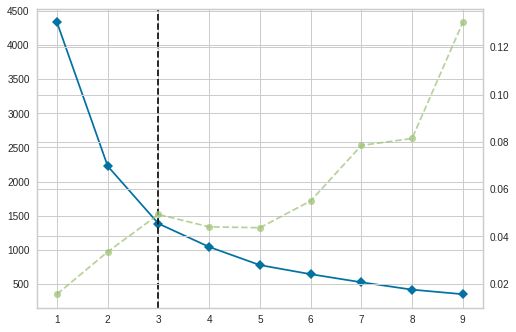

In [44]:
# 자동으로 k를 찾는 k-means

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaler)

In [45]:
# 스케일된 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0) # k값은 아까 구한 값 # ★★꼭바꿔주기★★
clusters = kmeans.fit(scaler)

#클러스터링 변수인 clusters 값을 원본 데이터 내에 넣기 
scaler['cluster'] = clusters.labels_
scaler

,Neck,Hip,cluster
0,0.707172,-0.626555,1
1,0.710871,-0.480589,0
2,0.775942,-0.258700,0
3,0.734914,-0.478289,0
4,0.707172,-0.409012,0
...,...,...,...
2162,-1.331897,-2.805821,1
2163,-1.331897,-2.834452,1
2164,-1.355638,-2.788949,1
2165,-1.346844,-2.757762,1


In [46]:
scaler.groupby('cluster').count() # cluster로 묶인것만 카운트

,Neck,Hip
cluster,,
0,1235,1235
1,674,674
2,258,258


In [47]:
# 그룹별 평균값

scaler.groupby('cluster').mean()

,Neck,Hip
cluster,,
0,0.493968,0.280931
1,-0.014099,-1.020907
2,-2.327705,1.322255


In [48]:
output = data[["FILE_Name", "OuPut"]]
scaler = pd.concat([scaler, output], axis=1)

In [49]:
scaler

,Neck,Hip,cluster,FILE_Name,OuPut
0,0.707172,-0.626555,1,20220819_153418_025_saved.jpg,GOOD
1,0.710871,-0.480589,0,20220819_153418_027_saved.jpg,GOOD
2,0.775942,-0.258700,0,20220819_153424_002_saved.jpg,GOOD
3,0.734914,-0.478289,0,20220819_153418_029_saved.jpg,GOOD
4,0.707172,-0.409012,0,20220819_153424_001_saved.jpg,GOOD
...,...,...,...,...,...
2162,-1.331897,-2.805821,1,IMG_9974.jpg,BAD4
2163,-1.331897,-2.834452,1,IMG_9976.jpg,BAD4
2164,-1.355638,-2.788949,1,IMG_9973.jpg,BAD4
2165,-1.346844,-2.757762,1,IMG_9975.jpg,BAD4


In [65]:
want = scaler[(scaler['cluster'] == 2) & (scaler['OuPut'] == "BAD4")]
want

,Neck,Hip,cluster,FILE_Name,OuPut
2088,-2.106639,1.770254,2,20220819_152919_003.jpg,BAD4
2089,-2.155405,1.789682,2,20220819_152919_002.jpg,BAD4
2090,-2.155405,1.553989,2,20220819_152919_001.jpg,BAD4
2091,-2.209531,1.987797,2,20220819_152919_004.jpg,BAD4
2092,-2.217155,2.009270,2,20220819_152919_005.jpg,BAD4
2093,-2.155405,1.890401,2,20220819_152919_006.jpg,BAD4
2094,-2.200434,1.929001,2,20220819_152919_007.jpg,BAD4
2095,-2.158953,1.982684,2,20220819_152919_008.jpg,BAD4
2096,-2.200434,1.758750,2,20220819_152919_011.jpg,BAD4
2097,-2.171031,1.879920,2,20220819_152919_014.jpg,BAD4


In [47]:
scaler.to_csv('/content/drive/MyDrive/stand_0913_kmeans(k3).csv', index=False, encoding="euc-kr") 
# scaler.to_csv('/content/drive/MyDrive/sit_0908_kmeans.csv', index=False, encoding="euc-kr") 

# 여기부턴 생략해도 됩니다
어떻게 묶였는지 보기 위해서 차원축소해본거라 kmeans랑 관계없습니다!

In [ ]:
# 클러스터가 날아가서 임시로 만들어줌

cluster = scaler[["cluster"]]
cluster

,cluster
0,3
1,2
2,2
3,3
4,2
...,...
2346,4
2347,4
2348,4
2349,4


In [ ]:
scaler = scaler[["Neck", "Hip"]]
# scaler = scaler[["Neck", "Knee"]]

In [ ]:
# 값이 2개인데 차원축소를 안시키면 표시가안됨
# 생략해도 괜찮은데 그림으로 보기 위해 넣어봄

from sklearn.decomposition import PCA 
X = scaler.copy() # 표준화 변수를 copy한 새로운 변수 'X'를 만들어 PCA를 적용

#객체
pca = PCA(n_components=2) # 2개로 축소

#적용
pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[-0.82118614, -0.15029577],
       [ 1.71621293, -2.75718092],
       [ 1.97637115, -3.01733914],
       ...,
       [-2.30911589,  1.64173069],
       [-2.31950547,  1.64679192],
       [ 1.23664137, -2.25520852]])

In [ ]:
# 보기 편하게 데이터프레임으로 표시

pca_scaler = pd.DataFrame(X_pca)
pca_scaler

,0,1
0,-0.821186,-0.150296
1,1.716213,-2.757181
2,1.976371,-3.017339
3,-0.764239,-0.212571
4,1.965855,-3.002800
...,...,...
2346,-2.338231,1.693628
2347,-2.211915,1.561874
2348,-2.309116,1.641731
2349,-2.319505,1.646792


In [ ]:
# 날아갔던 클러스터를 다시 합쳐줌

pca_scaler = pd.concat([pca_scaler, cluster], axis=1)
pca_scaler

,0,1,cluster
0,-0.821186,-0.150296,3
1,1.716213,-2.757181,2
2,1.976371,-3.017339,2
3,-0.764239,-0.212571,3
4,1.965855,-3.002800,2
...,...,...,...
2346,-2.338231,1.693628,4
2347,-2.211915,1.561874,4
2348,-2.309116,1.641731,4
2349,-2.319505,1.646792,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


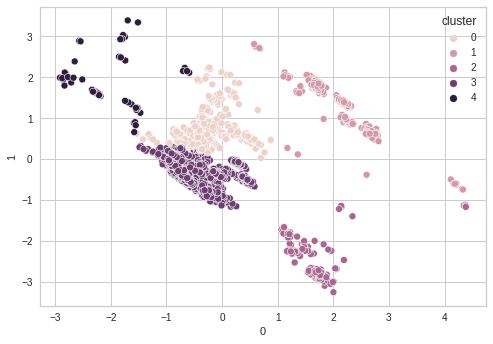

In [ ]:
axs = plt.subplots()
axs_KK = sns.scatterplot(0, 1, hue='cluster', data=pca_scaler)